In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('loan_train.csv')

df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_Medium,Loan_Amount_Term_Long
0,5849.0,0.0,128.0,1,1,0,0,0,0,0,0,1,0,1,0,1
1,4583.0,1508.0,128.0,0,1,1,1,0,0,0,0,1,0,0,0,1
2,3000.0,0.0,66.0,1,1,1,0,0,0,0,1,1,0,1,0,1
3,2583.0,2358.0,120.0,1,1,1,0,0,0,1,0,1,0,1,0,1
4,6000.0,0.0,141.0,1,1,0,0,0,0,0,0,1,0,1,0,1


In [3]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [4]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# scaling the numerical features
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [6]:
clf=DecisionTreeClassifier(random_state=42)

In [7]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[[21 22]
 [15 65]]
Accuracy: 0.6991869918699187
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53        43
           1       0.75      0.81      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.65      0.66       123
weighted avg       0.69      0.70      0.69       123



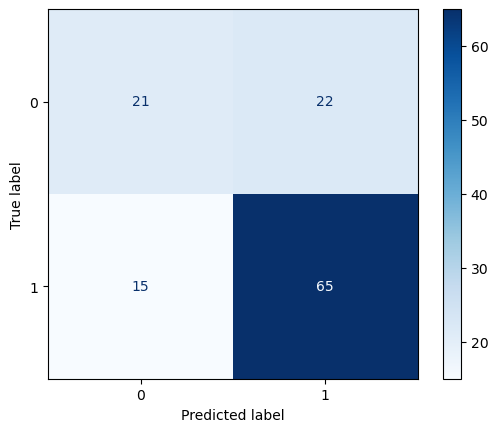

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix
                             )
disp.plot(cmap="Blues")


In [11]:
# hyper-parameter tuning

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [12]:
clf1=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [13]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [14]:
y_pred1 = clf1.predict(X_test)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[[20 23]
 [ 9 71]]
Accuracy: 0.7398373983739838
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



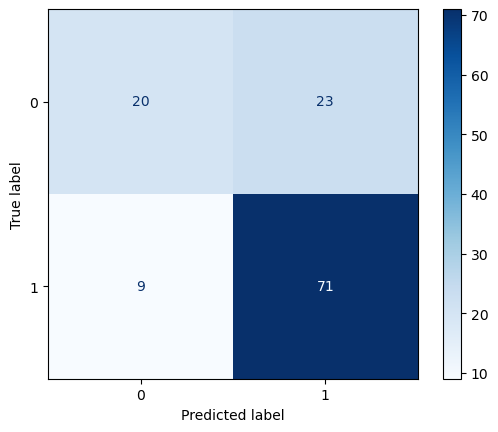

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred1)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix
                             )
disp.plot(cmap="Blues")

In [17]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split after resampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())

Before SMOTE: 1    422
0    192
Name: Loan_Status, dtype: int64
After SMOTE: 0    422
1    422
Name: Loan_Status, dtype: int64


In [18]:
# scaling the numerical columns
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

[[59 35]
 [ 6 69]]
Accuracy: 0.757396449704142
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74        94
           1       0.66      0.92      0.77        75

    accuracy                           0.76       169
   macro avg       0.79      0.77      0.76       169
weighted avg       0.80      0.76      0.75       169



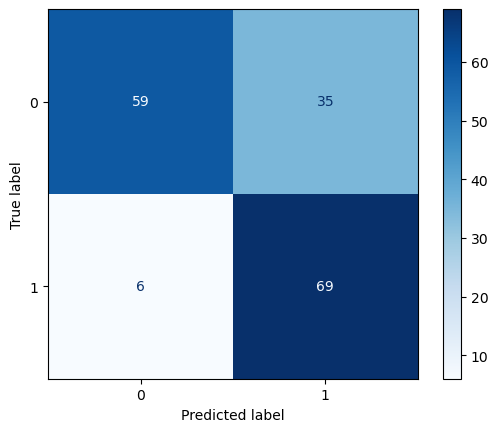

In [20]:
# training model 
clf=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)
clf.fit(X_train,y_train)
# prediction
y_pred = clf.predict(X_test)

# evaulating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")